# we will analyze the daily changed for VIX,VXXBEN,UVXY,SPY, and first to 4th month futures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
vixx_Data = pd.read_csv("vixDataUpdated", index_col="Date")

In [4]:
vixx_Data.index = pd.DatetimeIndex(vixx_Data.index)

In [5]:
vixx_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 18 columns):
UVXY                  3246 non-null float64
SPY                   3246 non-null float64
VXXBEN                3246 non-null float64
VIX                   3246 non-null float64
UX1                   3246 non-null float64
UX2                   3246 non-null float64
UX3                   3246 non-null float64
UX4                   3246 non-null float64
Day OF Week           3246 non-null int64
Rolling Days          3246 non-null int64
VXXBEN daily          3245 non-null float64
UVXY Daily Changes    3245 non-null float64
VIX Daily Changes     3245 non-null float64
SPY Daily Changes     3245 non-null float64
UX1_daily changes     3245 non-null float64
UX2_daily changes     3245 non-null float64
UX3_daily changes     3245 non-null float64
UX4_daily changes     3245 non-null float64
dtypes: float64(16), int64(2)
memory usage: 481.8 KB


## we will calculate the simple moving ,and Exponential Weighted Moving average (30, 60 days) of UVXY  along with its changes over the period 

In [6]:
vixx_Data["UVXY_MA_30"] = vixx_Data.rolling(30)["UVXY"].mean()

In [7]:
vixx_Data["UVXY_MA_60"] = vixx_Data.rolling(60)["UVXY"].mean()

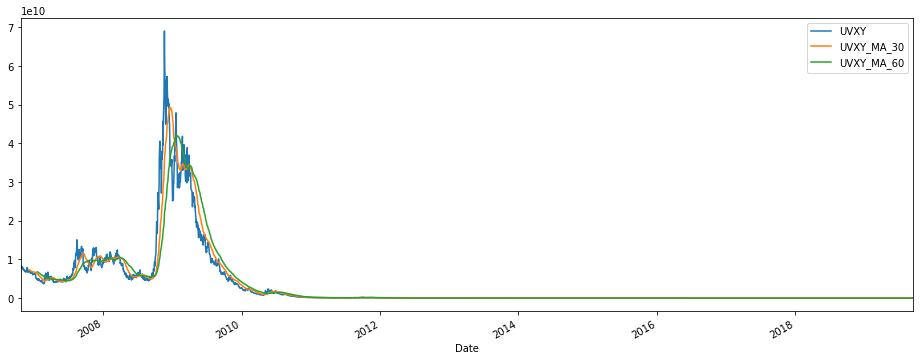

In [8]:
vixx_Data[["UVXY", "UVXY_MA_30", "UVXY_MA_60"]].plot(figsize = (16,6))

# EWMA

In [9]:
vixx_Data["UVXY-EWMA-30"] = vixx_Data["UVXY"].ewm(span=30).mean()

In [10]:
vixx_Data["UVXY-EWMA-60"] = vixx_Data["UVXY"].ewm(span=60).mean()

In [11]:
vixx_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 22 columns):
UVXY                  3246 non-null float64
SPY                   3246 non-null float64
VXXBEN                3246 non-null float64
VIX                   3246 non-null float64
UX1                   3246 non-null float64
UX2                   3246 non-null float64
UX3                   3246 non-null float64
UX4                   3246 non-null float64
Day OF Week           3246 non-null int64
Rolling Days          3246 non-null int64
VXXBEN daily          3245 non-null float64
UVXY Daily Changes    3245 non-null float64
VIX Daily Changes     3245 non-null float64
SPY Daily Changes     3245 non-null float64
UX1_daily changes     3245 non-null float64
UX2_daily changes     3245 non-null float64
UX3_daily changes     3245 non-null float64
UX4_daily changes     3245 non-null float64
UVXY_MA_30            3217 non-null float64
UVXY_MA_60            3187 non-null float64

# ETS Model (Error, Trend,Seasonal)

In [12]:
Ets_result = seasonal_decompose(vixx_Data["UVXY"], model="multiplicative", freq=12)

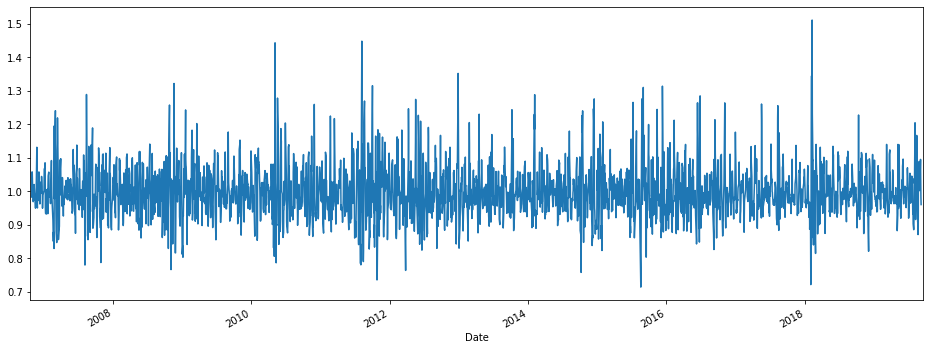

In [13]:
Ets_result.resid.plot(figsize = (16,6))

In [14]:
futures_data = vixx_Data[["UX1_daily changes", 'UX2_daily changes',"UX3_daily changes", "UX4_daily changes"]].dropna()

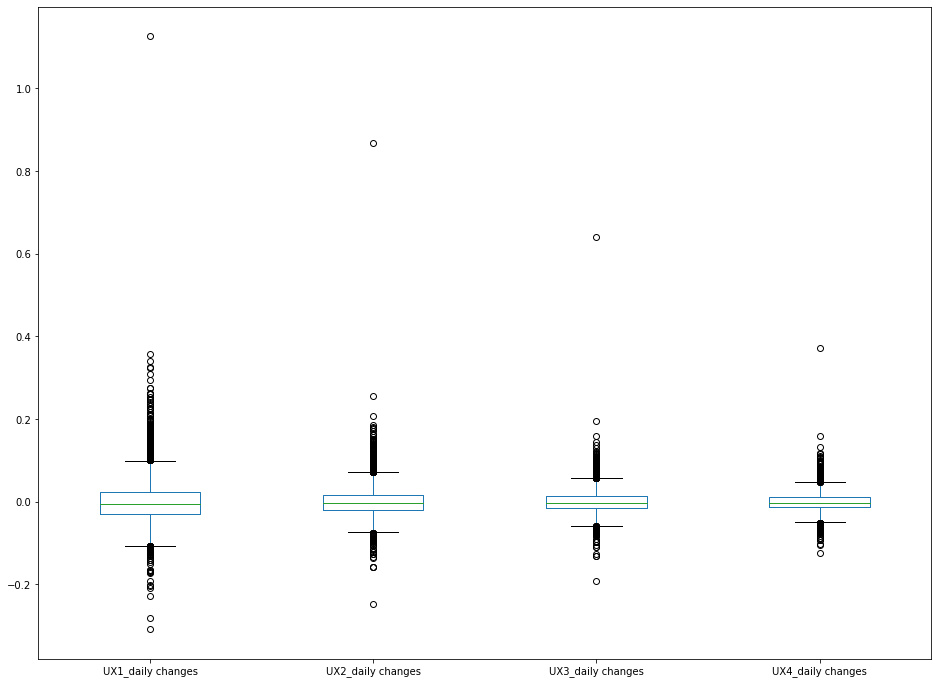

In [15]:
futures_data.plot(kind = "box", figsize = (16,12))

In [39]:
x_con = sm.add_constant(futures_data["UX3_daily changes"])
model = sm.OLS(futures_data["UX4_daily changes"], x_con).fit()

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS               Adj. R-squared:     0.933      
Dependent Variable: UX4_daily changes AIC:                -23416.7112
Date:               2020-01-19 01:10  BIC:                -23404.5415
No. Observations:   3245              Log-Likelihood:     11710.     
Df Model:           1                 F-statistic:        4.495e+04  
Df Residuals:       3243              Prob (F-statistic): 0.00       
R-squared:          0.933             Scale:              4.2982e-05 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025 0.975]
---------------------------------------------------------------------
const                 -0.0000   0.0001  -0.3774 0.7059 -0.0003 0.0002
UX3_daily changes      0.7873   0.0037 212.0208 0.0000  0.7800 0.7946
---------------------------------------------------------------------
Omnibus:              1865.872      Durbin-Watson:         2.341     
Prob(Omnibus):        0.000         Jarque-Bera (JB):      613979.743
Skew:                 -1.503        Prob(JB):              0.000     
Kurtosis:             70.320        Condition No.:         32        
=====================================================================

"""

In [44]:
results = stats.linregress(futures_data["UX3_daily changes"], futures_data["UX4_daily changes"])

In [45]:
results

LinregressResult(slope=0.7872851857821365, intercept=-4.34418720830925e-05, rvalue=0.9657701672182223, pvalue=0.0, stderr=0.00371324476964651)

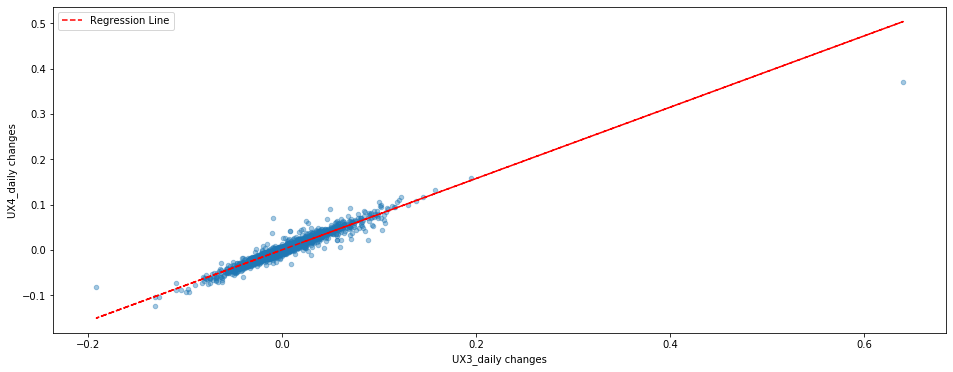

In [47]:
futures_data.plot(kind = "scatter", x = "UX3_daily changes", y = "UX4_daily changes", figsize = (16,6), alpha = 0.4)
plt.plot(futures_data["UX3_daily changes"], model.predict(), label = "Regression Line", c = "r", ls = "--")
plt.legend()

_______

### Because we see that there is consistence in the change from UX1 to UX4 the slope of the line shold be the same or very close. We see above that the slope of the regression line between UX1 and UX4 is .36 so the Slope between the regression line of UX2 and UX3 should be pretty close. We will test that hypothesis below. The rvalue of this was .85 meaning there is a 85% correlation between UX1 and UX4

In [34]:
x_con = sm.add_constant(futures_data["UX1_daily changes"])
model2 = sm.OLS(futures_data["UX2_daily changes"], x_con).fit()

In [35]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS               Adj. R-squared:     0.850      
Dependent Variable: UX2_daily changes AIC:                -17780.0338
Date:               2020-01-18 21:36  BIC:                -17767.8640
No. Observations:   3245              Log-Likelihood:     8892.0     
Df Model:           1                 F-statistic:        1.842e+04  
Df Residuals:       3243              Prob (F-statistic): 0.00       
R-squared:          0.850             Scale:              0.00024416 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025 0.975]
---------------------------------------------------------------------
const                 -0.0002   0.0003  -0.7989 0.4244 -0.0008 0.0003
UX1_daily changes      0.6239   0.0046 135.7212 0.0000  0.6149 0.6329
---------------------------------------------------------------------
Omnibus:             1234.861       Durbin-Watson:          2.352    
Prob(Omnibus):       0.000          Jarque-Bera (JB):       53954.596
Skew:                1.078          Prob(JB):               0.000    
Kurtosis:            22.859         Condition No.:          17       
=====================================================================

"""

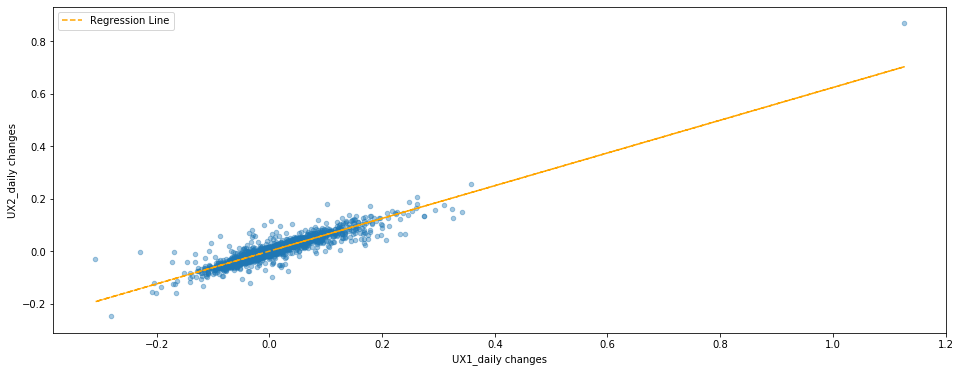

In [38]:
futures_data.plot(kind = "scatter", x = "UX1_daily changes", y = "UX2_daily changes", figsize = (16,6), alpha = 0.4)
plt.plot(futures_data["UX1_daily changes"], model2.predict(), label = "Regression Line", c = "orange", ls = "--")
plt.legend()